In [1]:
import sys
path_to_add = '../python_modules'
if path_to_add not in sys.path:
    sys.path.append(path_to_add)

In [2]:
import statistics
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt

In [3]:
import inferostatics
from dirichlet import param_shape, x_shape
import seeds

In [4]:
task = 'klre'
data_seeds_list = seeds.get_testdata_seeds(task)

x_test = []
param_0_test = []
param_1_test = []
y_test = []
true_llr_test = []

for data_seed in data_seeds_list:
    data = np.load(f'data/Trivariate_Dirichlet_{task}_seed={data_seed}.npz')
    x_test.append(data['x'])
    param_0_test.append(data['param_0'])
    param_1_test.append(data['param_1'])
    y_test.append(data['y'])
    true_llr_test.append(data['true_llr'])

del(data)

cce_loss = keras.losses.CategoricalCrossentropy(from_logits=True, reduction='none')
mse_loss = keras.losses.MeanSquaredError(reduction='none')

test_losses_dict = dict()
test_errors_dict = dict()

**Training task: KSE**  
**Network type: Inferostatic Network**

In [5]:
training_task = 'kse'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    
    llr_model = inferostatics_object.make_llr_model()
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    llr_model = inferostatics_object.make_llr_model(output_mode='logit', output_for='0')
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 895us/step
test_losses = [(0.68259275, 0.0003823057906645551), (0.6823193, 0.00040330513525030056), (0.68264633, 0.0004062805350171035), (0.6824045, 0.0003983134960710217), (0.68281835, 0.0003754628141440343)]
median=(0.68259275, 0.0003823057906645551)

test_errors = [(0.04906194, 0.002979249790757274), (0.04594064, 0.0029396154283250786), (0.04853558, 0.0028655596728381625), (0.049651675, 0.0030867113743784265), (0.04855541, 0.002932627482173996)]
median=(0.04855541, 0.002932627482173996)


**Training task: KSE**  
**Network type: Direct Network**

In [6]:
training_task = 'kse'
network_type = 'direct'
n_reps = 5

# EMPTY

**Training task: KLRE**  
**Network type: Inferostatic Network**

In [7]:
training_task = 'klre'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    
    llr_model = inferostatics_object.make_llr_model()
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    llr_model = inferostatics_object.make_llr_model(output_mode='logit', output_for='0')
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 949us/step
test_losses = [(0.6865348, 0.00040109857165845214), (0.68662584, 0.0003337630644610156), (0.6844425, 0.0004403379136411106), (0.68760806, 0.000304395228380002), (0.6851546, 0.00041616273752402615)]
median=(0.6865348, 0.00040109857165845214)

test_errors = [(0.086531386, 0.0032088202389889686), (0.08196141, 0.0031554242933330397), (0.06515976, 0.0029797319390621364), (0.09642153, 0.0033255694917743495), (0.06788075, 0.0029703668019724593)]
median=(0.08196141, 0.0031554242933330397)


**Training task: KLRE**  
**Network type: Direct Network**

In [8]:
training_task = 'klre'
network_type = 'direct'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    llr_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    output = llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]])
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        (output[:,0]-output[:,1]).reshape(-1, 1),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 912us/step
test_losses = [(0.69083756, 0.0002568378385846745), (0.69048, 0.0002541758682011585), (0.6904096, 0.00021582227110576548), (0.6911353, 0.00019741905623514577), (0.69106853, 0.0001826004292944703)]
median=(0.69083756, 0.0002568378385846745)

test_errors = [(0.12030913, 0.0034998674233871715), (0.11969711, 0.003470504629318337), (0.118173584, 0.00352345763184822), (0.12397633, 0.0035160610471025545), (0.12452884, 0.0035219976159101963)]
median=(0.12030913, 0.0034998674233871715)


**Training task: CARL**  
**Network type: Inferostatic Network**

In [9]:
training_task = 'carl'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    
    llr_model = inferostatics_object.make_llr_model()
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    llr_model = inferostatics_object.make_llr_model(output_mode='logit', output_for='0')
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 4s 1ms/step
test_losses = [(0.6842658, 0.0004118139784584336), (0.6837897, 0.0004344282041506868), (0.684307, 0.0004444323573820997), (0.6837687, 0.00045398828986724095), (0.6846736, 0.0004223938635104885)]
median=(0.6842658, 0.0004118139784584336)

test_errors = [(0.06588903, 0.003123773650896567), (0.061141226, 0.0031386469271234584), (0.06293156, 0.003121982841262283), (0.06331596, 0.0036154130017883256), (0.07297498, 0.0035099356148854243)]
median=(0.06331596, 0.0036154130017883256)


**Training task: CARL**  
**Network type: Direct Network**

In [10]:
training_task = 'carl'
network_type = 'direct'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    llr_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    output = llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]])
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        (output[:,0]-output[:,1]).reshape(-1, 1),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 903us/step
test_losses = [(0.69671756, 0.0006166320579825181), (0.69693065, 0.0006661832101827551), (0.6998988, 0.0006894046920521743), (0.71746624, 0.0009218680301130435), (0.6925037, 0.0005354110848508826)]
median=(0.69693065, 0.0006661832101827551)

test_errors = [(0.17200455, 0.0032599724421034267), (0.17698699, 0.003095656186714451), (0.1945226, 0.0033551539458926433), (0.3422762, 0.0034173993297476695), (0.13652246, 0.0032148600983638756)]
median=(0.17698699, 0.003095656186714451)


**Ideal**

In [11]:
tmp = cce_loss(
    keras.utils.to_categorical(y_test[0]),
    np.stack([true_llr_test[0]/2, -true_llr_test[0]/2], axis=-1),
).numpy()
print(np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5)

0.6797658205082474 0.0004944210274067007


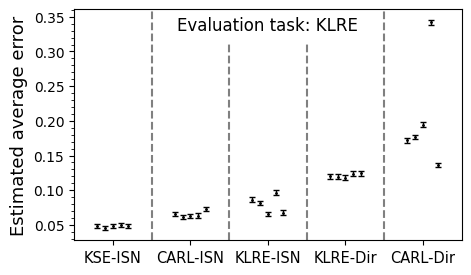

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))

x_labels = ['KSE-ISN', 'KLRE-ISN', 'KLRE-Dir', 'CARL-ISN', 'CARL-Dir']
x_keys = [('kse', 'inferostatic'), ('klre', 'inferostatic'), ('klre', 'direct'), ('carl', 'inferostatic'), ('carl', 'direct')]

sorted_idx = sorted(list(range(len(x_keys))), key=lambda i: statistics.median(test_errors_dict[x_keys[i]]))

x_labels = [x_labels[i] for i in sorted_idx]
x_keys = [x_keys[i] for i in sorted_idx]

for i in range(len(x_keys)):
    tmp = test_errors_dict[x_keys[i]]
    y = [_[0] for _ in tmp]
    yerr = [_[1] for _ in tmp]
    x = [i-0.2+0.1*j for j in range(len(y))]
    ax.errorbar(x, y, yerr, capsize=2, linewidth=0, elinewidth=1, fmt='.', markersize=2, color='black')

for i in range(len(x_keys)-1):
    ymax = 0.85
    if i in [0, len(x_keys)-2]:
        ymax = 1
    ax.axvline(x=i+0.5, linestyle='dashed', color='gray', ymax=ymax)

ax.set_xlim(-0.5, len(x_keys)-0.5)
ax.set_xticks(list(range(len(x_keys))))
ax.set_xticklabels(x_labels, fontsize=10.5)
ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.set_ylabel('Estimated average error', fontsize=13)
ax.text(0.5, 0.93, "Evaluation task: KLRE", ha='center', va='center', transform=ax.transAxes, fontsize=12)

fig.savefig('plots/klre_errors.pdf', bbox_inches='tight')

In [13]:
training_task = 'klre'
network_type = 'inferostatic'
n_reps = 5

tmp = test_losses_dict[(training_task, network_type)]
tmp = sorted(list(range(n_reps)), key=lambda i: tmp[i])
seed_idx = tmp[0]
print(f'{seed_idx = }')

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
network_seed = network_seeds_list[seed_idx]

potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                        param_shape=param_shape,
                                                        potential_model=potential_model,
                                                        expand_fn_args=False)
llr_model = inferostatics_object.make_llr_model(output_mode='logit', output_for='0')
pred_llr = llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]]).squeeze()

true_llr = true_llr_test[1].squeeze()

seed_idx = 2
3125/3125 [==============================] - 3s 957us/step


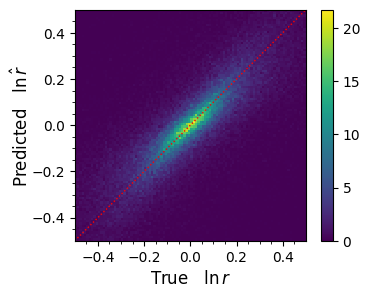

In [14]:
fig, ax = plt.subplots(figsize=(4, 3))

lim = .5
ax.set_aspect('equal')
_ = ax.hist2d(true_llr, pred_llr, bins=100, range=((-lim, lim), (-lim, lim)), density=True, rasterized=True)
plt.colorbar(_[3], ax=ax)
ax.set_xticks([-0.4, -0.2, 0, 0.2, 0.4])
ax.set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
ax.minorticks_on()
ax.set_xlabel(r'True   $\ln r$', fontsize=12)
ax.set_ylabel(r'Predicted   $\ln \hat{r}$', labelpad=0, fontsize=12)
    
ax.plot([-lim, lim], [-lim, lim], color='red', linestyle='dotted', linewidth=1)

fig.savefig('plots/llr_truevspred.pdf', bbox_inches='tight')